<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Data_nacional_grafico_barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [185]:
df=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv', sep= ',')

In [186]:
#Obtener la ultima fecha que tiene el csv
Fecha_actual= list(df.columns)[-1]

In [187]:
#Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
mip = df[['Grupo de edad', 'Sexo', Fecha_actual]]

#Se pueden generar 2 df; con la data de hombres y de mujeres
df_F = mip.groupby('Sexo').get_group('F').drop(['Sexo'], axis=1)
df_M = mip.groupby('Sexo').get_group('M').drop(['Sexo'], axis=1)
m = list(df_M[Fecha_actual])
f = list(df_F[Fecha_actual])

In [188]:
m

[3792,
 3105,
 3512,
 6059,
 15711,
 24871,
 25428,
 20929,
 17619,
 17240,
 16388,
 15420,
 11553,
 7298,
 5177,
 3528,
 4270]

In [189]:
f

[3489,
 2919,
 3635,
 6883,
 15667,
 24349,
 22679,
 18125,
 15352,
 16037,
 15247,
 13828,
 9865,
 6544,
 4943,
 3800,
 6742]

In [190]:
categoria = list(mip['Grupo de edad'].drop_duplicates())
rango=[]
for elem in categoria:
  elem = elem.replace(' años','')
  rango.append(elem)

rango

['00 - 04',
 '05 - 09',
 '10 - 14',
 '15 - 19',
 '20 - 24',
 '25 - 29',
 '30 - 34',
 '35 - 39',
 '40 - 44',
 '45 - 49',
 '50 - 54',
 '55 - 59',
 '60 - 64',
 '65 - 69',
 '70 - 74',
 '75 - 79',
 '80 y más']

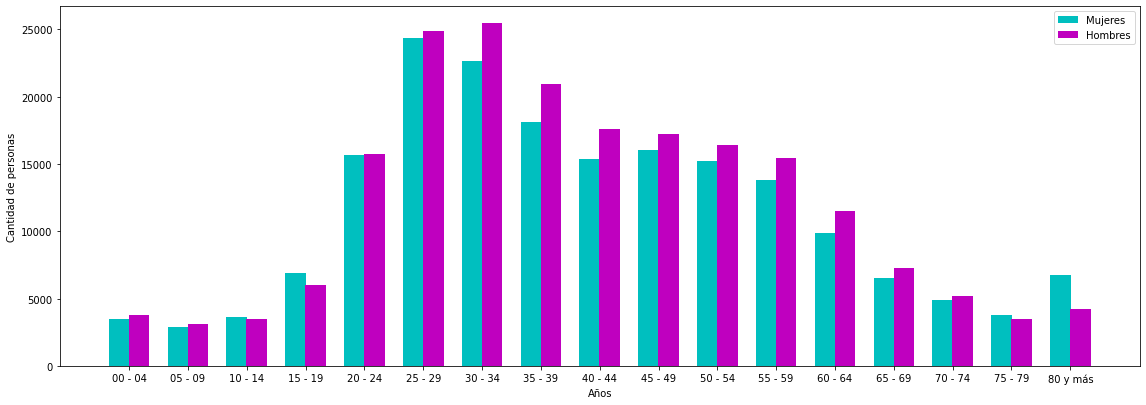

In [191]:
x = np.arange(17)
fig = plt.figure(figsize =(15,5))

ax = fig.add_axes([0,0,1,1])


ax.bar(x - 0.17, f, color = 'c', width = 0.35)
ax.bar(x + 0.17, m, color = 'm', width = 0.35)

ax.legend(labels=['Mujeres', 'Hombres'])

ax.set_xticks(x)
ax.set_xticklabels(rango)
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de personas')
#ax.bar(rango,f)
plt.show()